In [884]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [885]:
#task 1:
df_cars = pd.read_csv('USA_cars_datasets.csv', index_col=0)
df_cars

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [886]:
print("Mean of price: ", df_cars['price'].mean())
print("Median of price: ", df_cars['price'].median())
print(f"Var of price: {df_cars['price'].var()}")
print(f"Std of price: {df_cars['price'].std()}")

Mean of price:  18767.671468587436
Median of price:  16900.0
Var of price: 146799756.489702
Std of price: 12116.094935650759


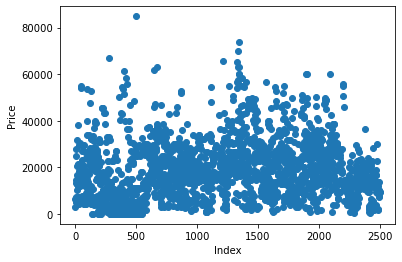

In [887]:
#task 2:
prices = df_cars["price"].astype(float)
plt.scatter(range(len(prices)), prices)
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

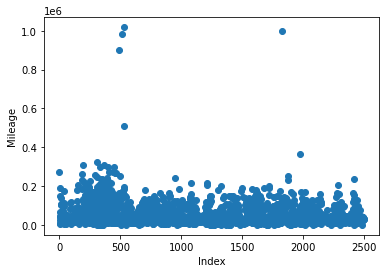

In [888]:
mileages = df_cars["mileage"].astype(float)
plt.scatter(range(len(mileages)), mileages)
plt.xlabel("Index")
plt.ylabel("Mileage")
plt.show()

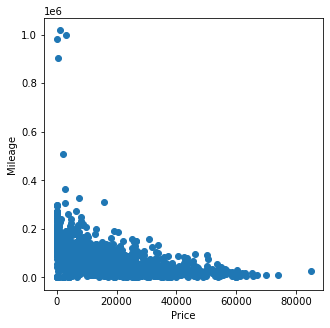

In [889]:
plt.figure(figsize=(5, 5))
plt.scatter(prices, mileages)
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.show()

In [890]:
# видно, что присутствует определённая нелинейная корреляция между ценами и пробегами машин: чем больше цена машины, тем меньше её пробег

In [891]:
IQR = np.percentile(prices, 75) - np.percentile(prices, 25)
upper_limit_extreme = np.percentile(prices, 75) + (IQR * 3)
print(upper_limit_extreme)

lower_limit_extreme = np.percentile(prices, 25) - (IQR * 3)
print(lower_limit_extreme)
df_cars = df_cars[(df_cars["price"] < upper_limit_extreme) & (df_cars["price"] > lower_limit_extreme)]

71622.0
-35866.5


In [892]:
IQR = np.percentile(mileages, 75) - np.percentile(mileages, 25)
upper_limit_extreme = np.percentile(mileages, 75) + (IQR * 3)
print(upper_limit_extreme)

lower_limit_extreme = np.percentile(mileages, 25) - (IQR * 3)
print(lower_limit_extreme)
df_cars = df_cars[(df_cars["mileage"] < upper_limit_extreme) & (df_cars["mileage"] > lower_limit_extreme)]

189490.5
-104551.5


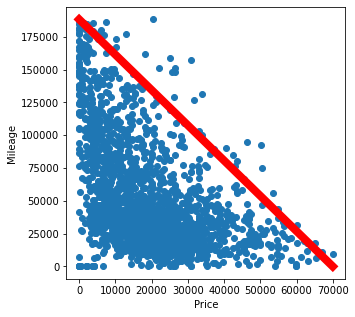

In [893]:
# после проведённой чистки от выбросов попробуем построить график ещё раз:
prices = df_cars["price"].astype(float)
mileages = df_cars["mileage"].astype(float)
plt.figure(figsize=(5, 5))
plt.scatter(prices, mileages)
plt.xlabel("Price")
plt.ylabel("Mileage")
x_min = prices.min()
y_max = mileages.max()
x_max = prices.max()
y_min = mileages.min()
plt.plot([x_min, x_max], [y_max, y_min], color='red', linestyle='-', linewidth=8)
plt.show()

In [894]:
# корреляция стала более заметной, все значения сильно сгруппировались в левом нижнем углу и почти не выходят за пределы красной линии
# чем больше цена, тем меньше максимальный пробег машин в этой ценовой категории

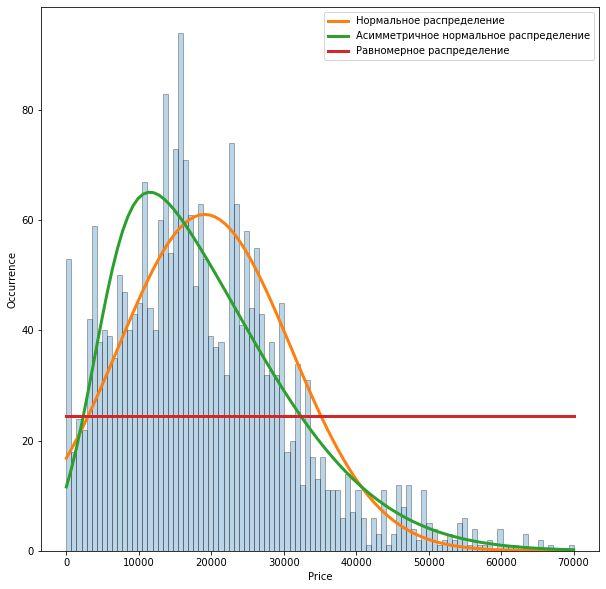

In [895]:
#task 3:
plt.figure(figsize=(10, 10))
n, bins, patches = plt.hist(prices, 100, edgecolor='black', alpha=0.3)
theoretic_prices = np.linspace(prices.min(), prices.max(), 100)

y_pdf = stats.norm.pdf(theoretic_prices, prices.mean(), prices.std())
y_pdf = y_pdf * sum(n) / sum(y_pdf)
y_skew_pdf = stats.skewnorm.pdf(theoretic_prices, *stats.skewnorm.fit(prices))
y_skew_pdf = y_skew_pdf * sum(n) / sum(y_skew_pdf)
y_uniform_pdf = stats.uniform.pdf(theoretic_prices, prices.min(), prices.max() - prices.min())
y_uniform_pdf = y_uniform_pdf * sum(n) / sum(y_uniform_pdf)

plt.plot(theoretic_prices, y_pdf, label='Нормальное распределение', linewidth=3)
plt.plot(theoretic_prices, y_skew_pdf, label='Асимметричное нормальное распределение', linewidth=3)
plt.plot(theoretic_prices, y_uniform_pdf, label='Равномерное распределение', linewidth=3)

plt.legend(loc = 'upper right', fontsize = 10)
plt.xlabel('Price')
plt.ylabel('Occurrence')
plt.show()

In [896]:
# гипотеза H0_1: распределение цен на машины - нормальное
# гипотеза H0_2: распределение цен на машины - асимметричное нормальное
# гипотеза H0_3: распределение цен на машины - равномерное

# критерий Хи-квадрат:
observed = n
expected = y_pdf
a = 0.05
statistics, p_value = stats.chisquare(observed, expected)
if p_value > a:
    print(f'p-value = {p_value}, гипотеза H0_1 не отвергается')
else:
    print(f'p-value = {p_value}, гипотеза H0_1 отвергается')

p-value = 6.225022287042147e-188, гипотеза H0_1 отвергается


In [897]:
observed = n
expected = y_skew_pdf
statistics, p_value = stats.chisquare(observed, expected)
if p_value > a:
    print(f'p-value = {p_value}, гипотеза H0_2 не отвергается')
else:
    print(f'p-value = {p_value}, гипотеза H0_2 отвергается')

p-value = 6.650796780581406e-48, гипотеза H0_2 отвергается


In [898]:
observed = n
expected = y_uniform_pdf
statistics, p_value = stats.chisquare(observed, expected)
if p_value > a:
    print(f'p-value = {p_value}, гипотеза H0_3 не отвергается')
else:
    print(f'p-value = {p_value}, гипотеза H0_3 отвергается')

p-value = 0.0, гипотеза H0_3 отвергается


In [899]:
# делаем вывод, что распределение не принадлежит ни одному из рассмотренных типов распределений

In [900]:
# теперь проверим используя критерий согласия Колмогорова:
print(stats.kstest(prices, 'norm', args=(prices.mean(), prices.std()))[1] > a)
print(stats.kstest(prices, 'skewnorm', args=(stats.skewnorm.fit(prices)))[1] > a)
print(stats.kstest(prices, 'uniform', args=(prices.min(), prices.max() - prices.min()))[1] > a)

False
False
False


In [901]:
# как мы видим, все гипотезы отвергаются обоими критериями